In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print('Done..!')

Done..!


In [2]:
# Importing the dataset
dataset = pd.read_csv(r'D:\Data\ML\Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
#separate the independent and dependent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [8]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [10]:
#Accuracy checks
# The coefficients
print('Coefficients         : %.2f' %float(regressor.coef_))
# The mean squared error
print("Mean squared error   : %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score       : %.2f' % regressor.score(X_test, y_test))

Coefficients         : 9345.94
Mean squared error   : 21026037.33
Variance score       : 0.97


In [11]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

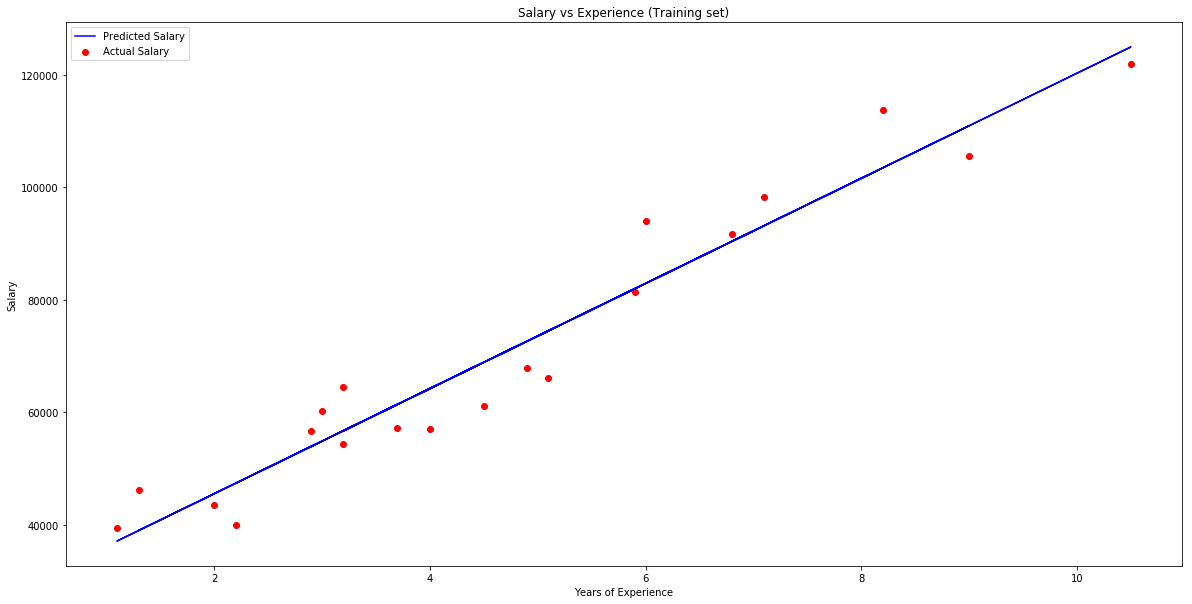

In [26]:
# Visualising the Training set results
plt.figure(figsize=(20,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Actual Salary')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label = 'Predicted Salary')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

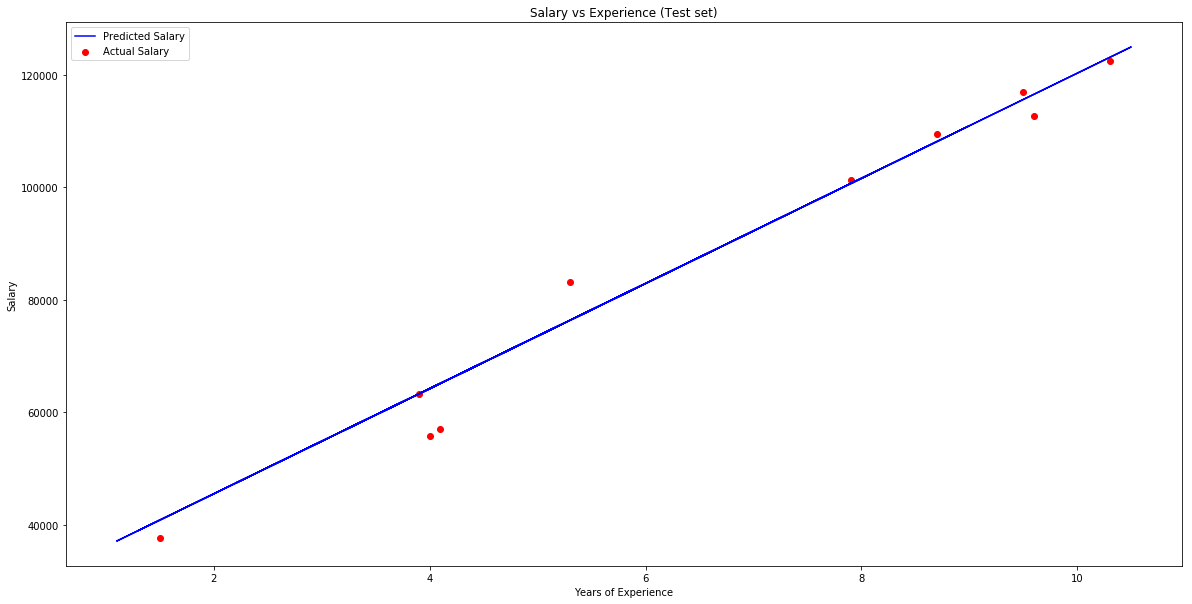

In [28]:
# Visualising the Test set results
plt.figure(figsize=(20,10))
plt.scatter(X_test, y_test, color = 'red', label = 'Actual Salary')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label = 'Predicted Salary')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [14]:
#Plot using plotly
def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i][0])
        
    return k

In [22]:
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
from plotly import graph_objs as go
import plotly.plotly as ply
import cufflinks as cf
init_notebook_mode(connected=True)

p1 = go.Scatter(x=data_to_plotly(X_test), 
                y=y_test, 
                mode='markers',
                marker=dict(color='black')
               )

p2 = go.Scatter(x=data_to_plotly(X_test), 
                y=regressor.predict(X_test),
                mode='lines',
                line=dict(color='blue', width=3)
                )

layout = go.Layout(xaxis=dict(ticks='', showticklabels=False,
                              zeroline=False),
                   yaxis=dict(ticks='', showticklabels=False,
                              zeroline=False),
                   showlegend=False, hovermode='closest',
                  )

fig = go.Figure(data=[p1, p2], layout=layout)

iplot(fig)